# Proyek Analisis Data: BikeSharing
- **Nama       :** Euis Rahmah Maratusholihah
- **Email      :** rahmah3847@gmail.com
- **ID Dicoding:** euis_rahmah_ms


## Menentukan Pertanyaan Bisnis

- 1) Bagaimana dinamika jumlah pengguna sepeda per hari, per bulan, per tahun?
- 2) Apakah jenis hari dan hari libur berdampak signifikan terhadap jumlah pengguna?
- 3) Bagaimana pola penyewaan pada pagi, siang, sore, dan malam?
- 4) Jam berapa yang menajdi jam sibuk dan paling ramai?
- 5) Bagaimana hubungan antara cuaca dan musim bagi penyewa sepeda?
- 6) Adakah korelasi antara suhu, kelembapan, kecepatan angin pada pengguna sepeda?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

**Membaca data file day.csv**

In [2]:
daily_bike_df = pd.read_csv("C:/Users/rahma/submission/data/day.csv")
daily_bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Membaca data hour.csv**

In [3]:
hourly_bike_df = pd.read_csv("C:/Users/rahma/submission/data/hour.csv")
hourly_bike_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

**Memeriksa tipe data dari setiap kolom dari data day.csv**

In [4]:
daily_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Memeriksa apakah ada missing value dalam data day.csv**

In [5]:
daily_bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Memeriksa apakah ada data duplikat dalam data day.csv**

In [6]:
print("Jumlah duplikasi: ", daily_bike_df.duplicated().sum())

Jumlah duplikasi:  0


**Memeriksa parameter statistik dari data `daily_bike`**

In [7]:
daily_bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Memeriksa tipe data dari setiap kolom dari data hour.csv**

In [8]:
hourly_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Memeriksa apakah ada missing value dalam data hour.csv**

In [9]:
hourly_bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Memeriksa apakah ada data duplikat dalam data hour.csv**

In [10]:
print("Jumlah duplikasi: ", hourly_bike_df.duplicated().sum())

Jumlah duplikasi:  0


**Memeriksa parameter statistik dari data hour.csv**

In [11]:
hourly_bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Pada kedua data terdapat kesamaan, yaitu :
- Terdapat kesalah tipe data. Kolom data 'dteday' harusnya direpresentasikan sebagai tipe data datetime, bukan object
- Tidak ada missing value
- Tidak ada data duplikat
- Tidak ada keanehan pada parameter statistik

### Cleaning Data

**Merubah tipe data kolom 'dteday' dari 'object' menjadi 'datetime' pada data daily_bike**

In [12]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  daily_bike_df[column] = pd.to_datetime(daily_bike_df[column])

**Memeriksa kembali apakah tipe data kolom sudah tepat**

In [13]:
daily_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Merubah tipe data kolom 'dteday' dari 'object' menjadi 'datetime' pada data hourly_bike**

In [14]:
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hourly_bike_df[column] = pd.to_datetime(hourly_bike_df[column])

**Memeriksa kembali apakah tipe data kolom sudah tepat**

In [15]:
hourly_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data pada kolom 'dteday' pada kedua data 'daily_bike_df' dan 'hourly_bike_df' sudah berganti dari 'object' menjadi 'datetime'

## Exploratory Data Analysis (EDA)

### Explore `daily_bike_df`

In [16]:
daily_bike_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Jumlah pengguna per tahun

In [17]:
daily_bike_df.groupby(daily_bike_df["dteday"].dt.year).agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
dteday,,
2011,247252,995851
2012,372765,1676811


#### Jumlah pengguna dan persentase peningkatan per tahun

In [18]:
year_data = daily_bike_df.groupby(daily_bike_df["dteday"].dt.year).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

year_data[["%casual_increase", "%registered_increase", "%cnt_increase"]] = (year_data[["casual", "registered", "cnt"]].pct_change() * 100).round(2)
year_data.fillna(0, inplace=True)

print(year_data)

        casual  registered      cnt  %casual_increase  %registered_increase  \
dteday                                                                        
2011    247252      995851  1243103              0.00                  0.00   
2012    372765     1676811  2049576             50.76                 68.38   

        %cnt_increase  
dteday                 
2011             0.00  
2012            64.88  


#### Jumlah pengguna per bulan

In [105]:
daily_bike_df["month_name"] = daily_bike_df["dteday"].dt.month_name()

month_counts = daily_bike_df.groupby(by="month_name").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by=('cnt'), ascending=False)

print (month_counts)


            casual  registered     cnt
month_name                            
August       72039      279155  351194
June         73906      272436  346342
September    70323      275668  345991
July         78157      266791  344948
May          75285      256401  331686
October      59760      262592  322352
April        60802      208292  269094
November     36603      218228  254831
March        44444      184476  228920
December     21693      189343  211036
February     14963      136389  151352
January      12042      122891  134933


In [77]:
daily_bike_df["month_name"] = daily_bike_df["dteday"].dt.month_name()

# Pivot the DataFrame
daily_bike_df.pivot_table(index="month_name",
                          columns=daily_bike_df["dteday"].dt.year,
                          values=["casual", "registered"],
                          aggfunc=["sum", "mean"])

sum                                                   mean  \
           casual            cnt         registered               casual   
dteday       2011   2012    2011    2012       2011    2012         2011   
month_name                                                                 
April       22346  38456   94870  174224      72524  135768   744.866667   
August      28842  43197  136691  214503     107849  171306   930.387097   
December     8448  13245   87323  123713      78875  110468   272.516129   
February     6242   8721   48215  103137      41973   94416   222.928571   
January      3073   8969   38189   96744      35116   87775    99.129032   
July        36452  41705  141341  203607     104889  161902  1175.870968   
June        30612  43294  143512  202830     112900  159536  1020.400000   
March       12826  31618   64045  164875      51219  133257   413.741935   
May         31050  44235  135821  195865     104771  151630  1001.612903   
November    15594  21009  102167  152664      86573  131655   519.800000   
October     25222  34538  123511  198841      98289  164303   813.612903   
September   26545  43778  127418  218573     100873  174795   884.833333   

                                                                             
                                 cnt                registered               
dteday             2012         2011         2012         2011         2012  
month_name                                                                   
April       1281.866667  3162.333333  5807.466667  2417.466667  4525.600000  
August      1393.451613  4409.387097  6919.451613  3479.000000  5526.000000  
December     427.258065  2816.870968  3990.741935  2544.354839  3563.483871  
February     300.724138  1721.964286  3556.448276  1499.035714  3255.724138  
January      289.322581  1231.903226  3120.774194  1132.774194  2831.451613  
July        1345.322581  4559.387097  6567.967742  3383.516129  5222.645161  
June        1443.133333  4783.733333  6761.000000  3763.333333  5317.866667  
March       1019.935484  2065.967742  5318.548387  1652.225806  4298.612903  
May         1426.935484  4381.322581  6318.225806  3379.709677  4891.290323  
November     700.300000  3405.566667  5088.800000  2885.766667  4388.500000  
October     1114.129032  3984.225806  6414.225806  3170.612903  5300.096774  
September   1459.266667  4247.266667  7285.766667  3362.433333  5826.500000

#### Rata-rata pengguna berdasarkan hari libur atau hari kerja

In [95]:
#Mengategorikan data integer hari libur/hari kerja menjadi deskripsi denganm manual grouping
daily_bike_df["day_type"] = daily_bike_df.workingday.apply(lambda x: "Work Day" if x == 1 else "Holiday")
daily_bike_df.groupby(by="day_type").instant.nunique().sort_values(ascending=False)
workholiday = daily_bike_df.groupby(by="day_type").agg({
    "casual": ["mean"],
    "registered": ["mean"],
}).sort_values(by=("registered","mean"), ascending=False)

print(workholiday)

               casual   registered
                 mean         mean
day_type                          
Work Day   606.570000  3978.250000
Holiday   1371.134199  2959.034632


#### Jumlah pengguna berdasarkan musim

In [23]:
#Mengategorikan data integer dalam `season` menjadi deskripsi nama musim dengan manual grouping
daily_bike_df["season_name"] = daily_bike_df.season.apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
daily_bike_df.groupby(by="season_name").instant.nunique().sort_values(ascending=False)


season_name
Fall      188
Summer    184
Spring    181
Winter    178
Name: instant, dtype: int64

In [24]:
daily_bike_df["season_name"] = daily_bike_df.season.apply(lambda x: "Spring" if x == 1 else ("Summer" if x == 2 else ("Fall" if x == 3 else "Winter")))
daily_bike_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_name,season_name
288,289,2011-10-16,4,0,10,0,0,0,1,0.511667,0.503154,0.486667,0.281717,1748,3293,5041,October,Winter
291,292,2011-10-19,4,0,10,0,3,1,3,0.541739,0.513848,0.895217,0.243339,254,2170,2424,October,Winter
27,28,2011-01-28,1,0,1,0,5,1,2,0.203478,0.223317,0.793043,0.123300,38,1129,1167,January,Spring
263,264,2011-09-21,3,0,9,0,3,1,2,0.595000,0.550533,0.900000,0.096404,539,3813,4352,September,Fall
29,30,2011-01-30,1,0,1,0,0,0,1,0.216522,0.250322,0.722174,0.073983,140,956,1096,January,Spring
682,683,2012-11-13,4,1,11,0,2,1,2,0.343333,0.323225,0.662917,0.342046,327,3767,4094,November,Winter
658,659,2012-10-20,4,1,10,0,6,0,1,0.484167,0.472842,0.572917,0.117537,2806,5284,8090,October,Winter
231,232,2011-08-20,3,0,8,0,6,0,1,0.697500,0.648996,0.674167,0.104467,1914,3277,5191,August,Fall
684,685,2012-11-15,4,1,11,0,4,1,2,0.321667,0.324492,0.620417,0.152987,320,5125,5445,November,Winter
476,477,2012-04-21,2,1,4,0,6,0,1,0.570000,0.542921,0.682917,0.283587,2541,4083,6624,April,Summer


In [127]:
season_name = daily_bike_df.groupby(by="season_name").agg({
    "casual": ["sum"],
    "registered": ["sum"],
}).sort_values(by=("registered","sum"), ascending=False)

print(season_name)

             casual registered
                sum        sum
season_name                   
Fall         226091     835038
Summer       203522     715067
Winter       129782     711831
Spring        60622     410726


#### Rata-rata jumlah pengguna berdasarkan hari

In [26]:
#Mengategorikan data integer hari menjadi deskripsi nama hari dengan manual grouping
daily_bike_df["rent_day"] = daily_bike_df.weekday.apply(lambda x: "Monday" if x == 0 else ("Tuesday" if x == 1 else ("Wednesday" if x == 2 else ("Thursday" if x == 3 else ("Friday" if x == 4 else ("Saturday" if x == 5 else "Sunday"))))))
daily_bike_df.groupby(by="rent_day").dteday.nunique().sort_values(ascending=False)

rent_day
Monday       105
Tuesday      105
Sunday       105
Saturday     104
Friday       104
Thursday     104
Wednesday    104
Name: dteday, dtype: int64

In [27]:
#Mengategorikan data integer hari menjadi deskripsi nama hari dengan manual grouping (cara berbeda)
day_names = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

daily_bike_df["rent_day"] = daily_bike_df["weekday"].map(lambda x: day_names[x])
daily_bike_df.groupby("rent_day").dteday.nunique().sort_values(ascending=False)

rent_day
Monday       105
Tuesday      105
Sunday       105
Saturday     104
Friday       104
Thursday     104
Wednesday    104
Name: dteday, dtype: int64

In [117]:
day_counts = daily_bike_df.groupby(by="rent_day").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
}).sort_values(by=[("cnt", "mean")], ascending=False).round(0)

print(day_counts)

           casual registered
             mean       mean
rent_day                    
Friday      591.0     4076.0
Thursday    551.0     3997.0
Wednesday   556.0     3954.0
Saturday    752.0     3938.0
Tuesday     674.0     3664.0
Sunday     1465.0     3085.0
Monday     1338.0     2891.0


#### Jumlah pengguna berdasarkan tipe cuaca

In [29]:
daily_bike_df["weather_type"] = daily_bike_df.weathersit.apply(lambda x: "Clear, Few clouds, Partly cloudy, Partly cloudy" if x == 1 else ("Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" if x == 2 else ("Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" if x == 3 else "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")))
daily_bike_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month_name,season_name,rent_day,weather_type
70,71,2011-03-12,1,0,3,0,6,0,1,0.329167,0.325750,0.594583,0.220775,724,1408,2132,March,Spring,Sunday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
407,408,2012-02-12,1,1,2,0,0,0,1,0.127500,0.101658,0.464583,0.409212,73,1456,1529,February,Spring,Monday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
147,148,2011-05-28,2,0,5,0,6,0,1,0.655833,0.612379,0.729583,0.230092,2001,2757,4758,May,Summer,Sunday,"Clear, Few clouds, Partly cloudy, Partly cloudy"
616,617,2012-09-08,3,1,9,0,6,0,2,0.659167,0.611121,0.799167,0.281104,1557,4419,5976,September,Fall,Sunday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."
610,611,2012-09-02,3,1,9,0,0,0,2,0.696667,0.649000,0.815000,0.064071,2613,3197,5810,September,Fall,Monday,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe..."


In [118]:
#Mengategorikan data integer cuaca menjadi deskripsi cuaca denganm manual grouping
daily_bike_df["weather_type"] = daily_bike_df.weathersit.apply(lambda x: "Clear, Few clouds, Partly cloudy, Partly cloudy" if x == 1 else ("Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist" if x == 2 else ("Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds" if x == 3 else "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog")))

#
weatherday_counts = daily_bike_df.groupby(by="weather_type").agg({
    "casual": ["mean"],
    "registered": ["mean"],
})
print(weatherday_counts)

                                                        casual   registered
                                                          mean         mean
weather_type                                                               
Clear, Few clouds, Partly cloudy, Partly cloudy     964.030238  3912.755940
Light Snow, Light Rain + Thunderstorm + Scatter...  185.476190  1617.809524
Mist + Cloudy, Mist + Broken clouds, Mist + Few...  687.352227  3348.510121


#### Korelasi jumlah pengguna dengan parameter meteorologi udara : suhu, kelembapan, dan kecepatan angin

In [31]:
atmosfer_df = daily_bike_df[["hum", "temp", "windspeed", "cnt"]]
atmosfer_df.corr()

,hum,temp,windspeed,cnt
hum,1.000000,0.126963,-0.248489,-0.100659
temp,0.126963,1.000000,-0.157944,0.627494
windspeed,-0.248489,-0.157944,1.000000,-0.234545
cnt,-0.100659,0.627494,-0.234545,1.000000


**Insight:**
- Korelasi antara jumlah pengguna dengan tingkat kelembapan dan kecepatan angin menunjukkan nilai negatif atau disebut **korelasi berlawanan** *(negative correlation)*
- Korelasi antara jumlah pengguna dengan suhu menunjukkan nilai positif dan cukup bersesuaian *(positive correlation)*

### Explore `hourly_bike_df`

#### Rata-rata jumlah pengguna per periode

In [129]:
# Data jam dalam kolom "hr" dibagi menjadi 4 interval dan diberikan label: pagi (0-6), siang (6-12), sore (12-18), dam  malam (18-24)
labels = ["Night", "Morning", "Afternoon", "Evening"]
hourly_bike_df["Periode"] = pd.cut(hourly_bike_df["hr"], bins=bins, labels=labels, include_lowest=True)  

hourly_bike_df.groupby(hourly_bike_df["Periode"]).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean",
}).round(0).sort_values(by="cnt", ascending=False)

C:\Users\rahma\AppData\Local\Temp\ipykernel_38212\4126413641.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_bike_df.groupby(hourly_bike_df["Periode"]).agg({


,casual,registered,cnt
Periode,,,
Afternoon,72.0,252.0,324.0
Morning,40.0,198.0,238.0
Evening,30.0,156.0,186.0
Night,4.0,28.0,32.0


#### Rata-rata jumlah pengguna per jam

In [49]:
hourly_bike_df.groupby(hourly_bike_df["hr"]).agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).round(0).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hr,,,
17,74.0,387.0,461.0
18,61.0,364.0,426.0
8,22.0,337.0,359.0
16,74.0,238.0,312.0
19,49.0,263.0,312.0
13,72.0,181.0,254.0
12,68.0,185.0,253.0
15,75.0,176.0,251.0
14,76.0,165.0,241.0


**Insight:**
- Dari tahun 2011 hingga tahun 2012, jumlah penyewa sepeda meningkat sebanyak 64.8%
- Jumlah pengguna tertinggi terjadi di bulan Agustus
- Rata rata jumlah pengguna pada hari libur dan hari kerja tidak terlalu berbeda jauh
- Urutan musim yang menjadi favorit para pengguna adalah Fall, Summer, Winter, Spring
- Jumlah pengguna terbanyak ada di akhir pekan, dengan paling tinggi di hari Saturday, Friday, Sunday
- Jumlah pengguna terbanyak ada pada cuaca 'Clear, Few clouds, Partly cloudy, Partly cloudy'. Tidak ada sama sekali pengguna pada cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Tingkat kelembapan dan kecepatan angin berkorelasi negatif dengan jumlah pengguna, yang menunjukkan semakin tinggi kelembapan udara dan kecepatan angin, semakin rendah jumlah pengguna
- Suhu dan jumlah pengguna berkorelasi positif, dann menunjukkan bahwa dengan suhu yang lebih tinggi menunjukkan jumlah penyewa yang lebih banyak
- Jumlah pengguna paling banyak pada sore hari dan paling sedikit di malam hari
- Rata-rata jumlah pengguna tertinggi berada pada am 17, 18, 8, 16, dan 9.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana dinamika jumlah pengguna sepeda per hari, per bulan, per tahun?


#### Grafik Jumlah Pengguna per Tanggal

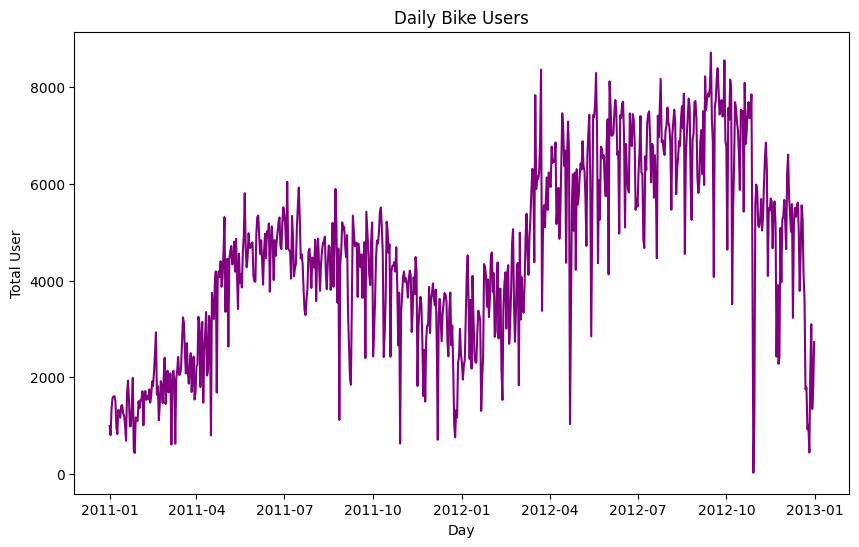

In [44]:
plt.figure(figsize=(10, 6))
plt.plot(daily_bike_df["dteday"], daily_bike_df["cnt"], color="purple")
plt.xlabel("Day")
plt.ylabel("Total User")
plt.title('Daily Bike Users')
plt.show()

### Pertanyaan 2 : Apakah hari kerja dan hari libur berdampak signifikan terhadap jumlah pengguna?

#### Grafik Rata-Rata Jumlah Pengguna per Hari

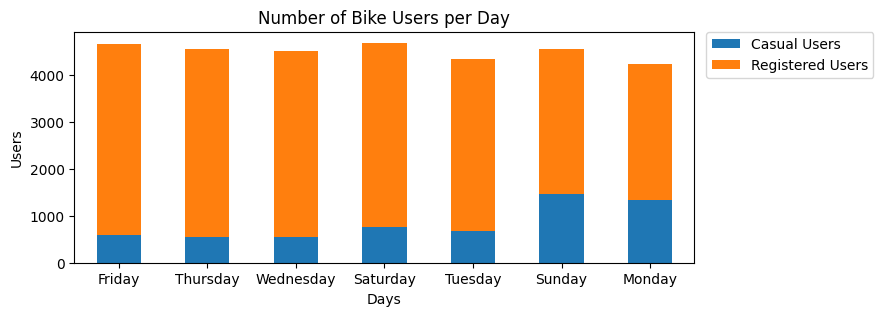

In [87]:
day_counts.columns = ["Casual Users", "Registered Users"]
day_counts.plot(kind='bar', stacked=True, figsize=(8,3))
plt.title("Number of Bike Users per Day")
plt.xlabel("Days")
plt.ylabel("Users")
plt.xticks(rotation=0)
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.9))
plt.show()

#### Grafik Rata-rata Pengguna per Jenis Hari

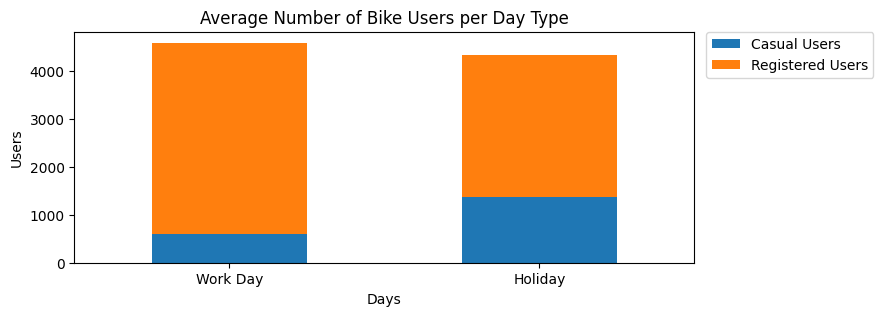

In [96]:
workholiday.columns = ["Casual Users", "Registered Users"]
workholiday.plot(kind='bar', stacked=True, figsize=(8,3))
plt.title("Average Number of Bike Users per Day Type")
plt.xlabel("Days")
plt.ylabel("Users")
plt.xticks(rotation=0)
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.9))
plt.show()

#### Grafik Jumlah Pengguna per Bulan

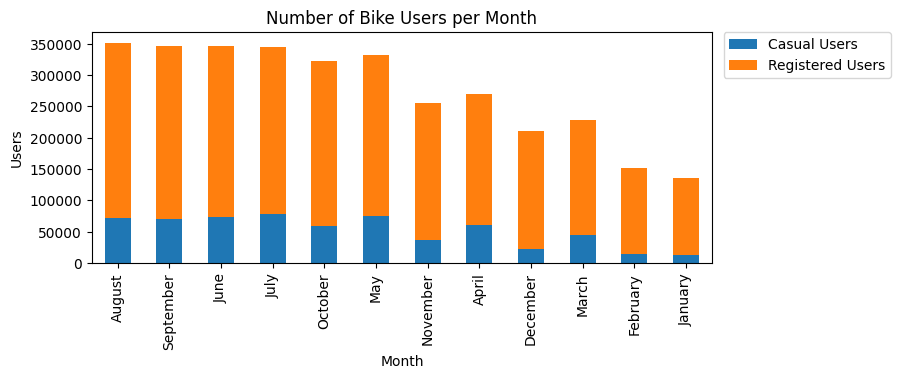

In [104]:
month_counts.columns = ["Casual Users", "Registered Users"]
month_counts.plot(kind="bar", stacked=True, figsize=(8,3))
plt.title("Number of Bike Users per Month")
plt.xlabel("Month")
plt.ylabel("Users")
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.9))
plt.show()

### Pertanyaan 3 : Bagaimana pola penyewaan pada pagi, siang, sore, dan malam dan jam berapa yang menajdi jam sibuk dan paling ramai?

#### Grafik Rata-Rata Pengguna Per Jam (top 5)

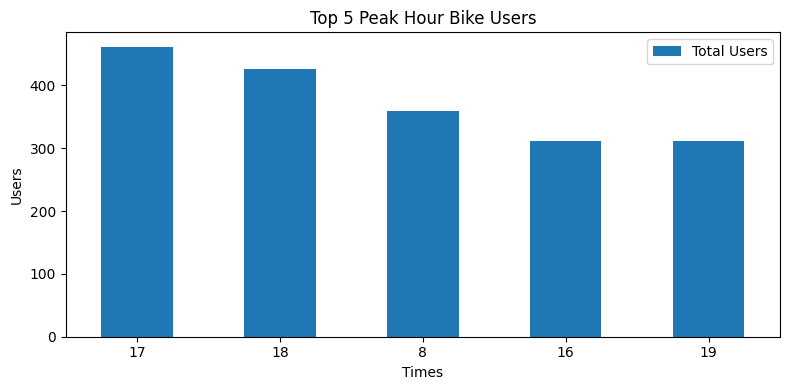

In [124]:
hourly_stats = hourly_bike_df.groupby(hourly_bike_df["hr"]).agg({
    "cnt": "mean",
}).sort_values(by="cnt",ascending = False).head(5)

hourly_stats.columns = ["Total Users"]
hourly_stats.plot(kind='bar', figsize=(8, 4))

plt.title("Top 5 Peak Hour Bike Users")
plt.xlabel("Times")
plt.ylabel("Users")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana hubungan antara cuaca dan musim bagi penyewa sepeda?

#### Grafik Jumlah Pengguna berdasarkan cuaca

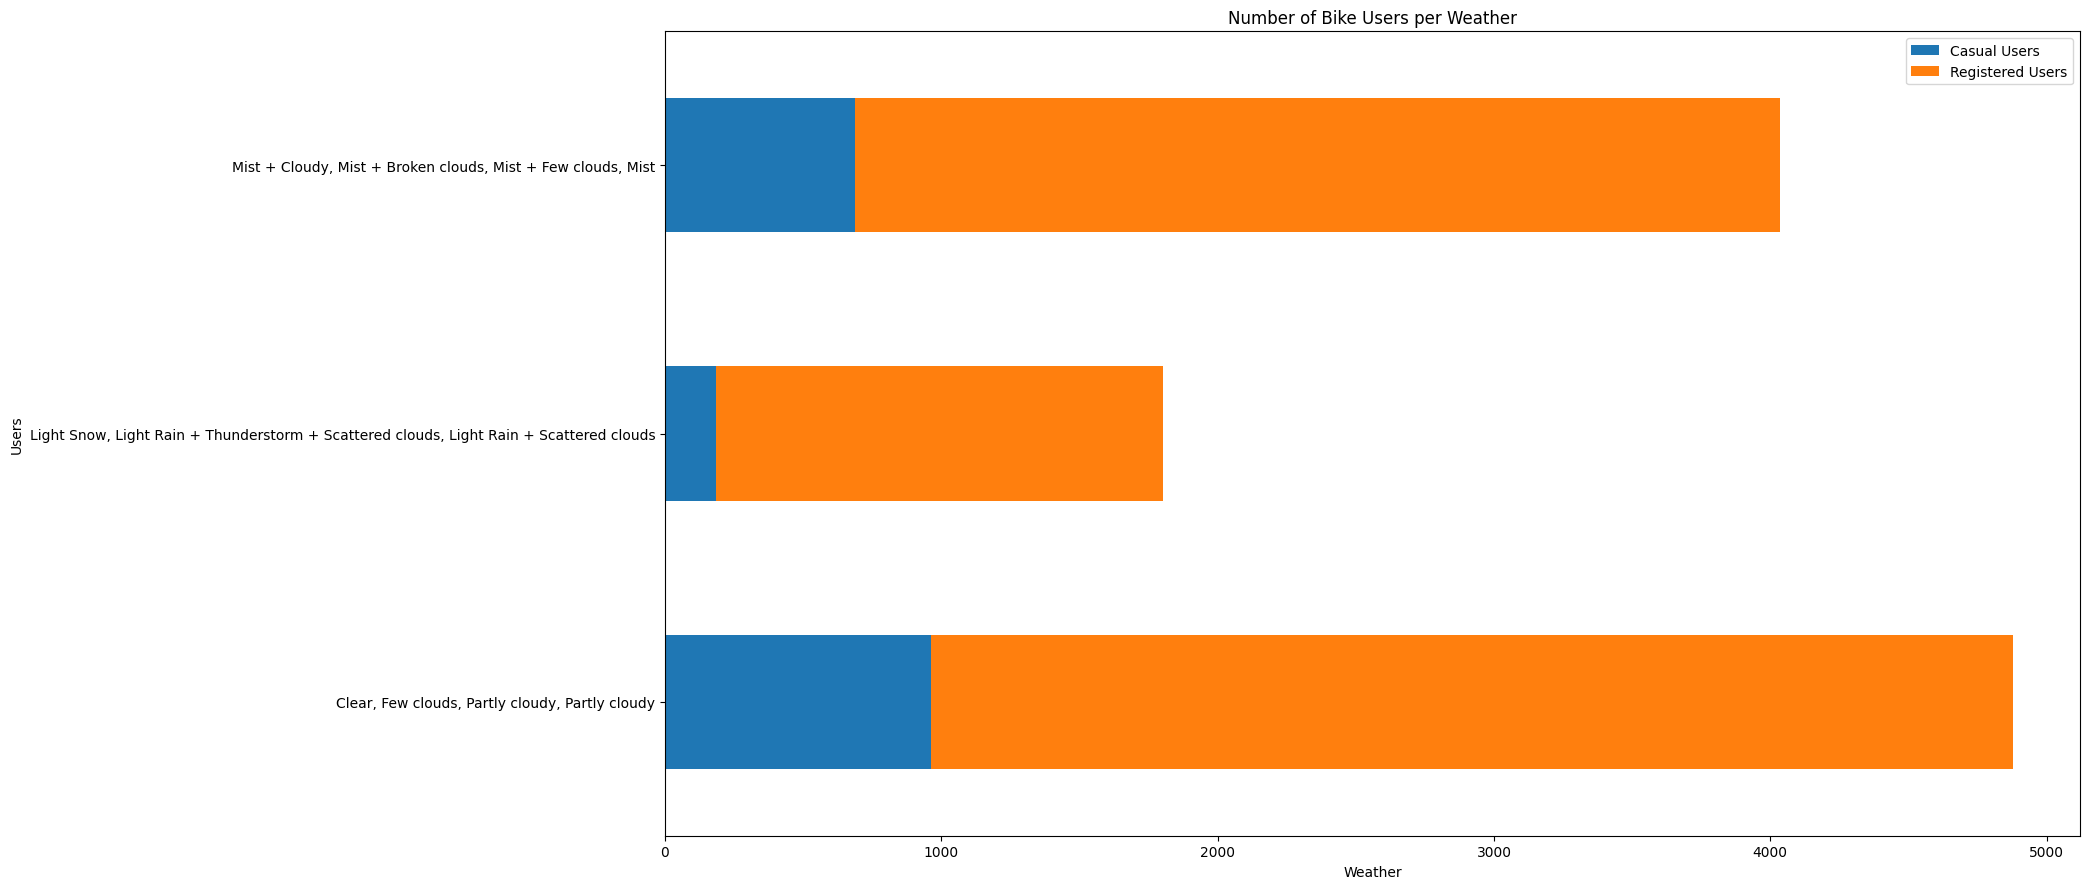

In [120]:
weatherday_counts.columns = ["Casual Users", "Registered Users"]
weatherday_counts.plot(kind='barh', stacked=True, figsize=(21, 9))
plt.title("Number of Bike Users per Weather")
plt.xlabel("Weather")
plt.ylabel("Users")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Grafik Jumlah Pengguna Berdasarkan Musim

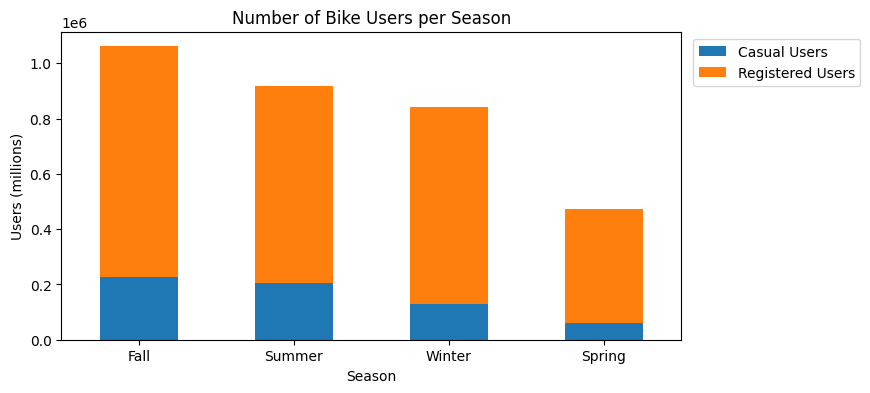

In [128]:
season_name.columns = ["Casual Users", "Registered Users"]
season_name.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title("Number of Bike Users per Season")
plt.xlabel("Season")
plt.ylabel("Users (millions)")
plt.xticks(rotation=0)
plt.legend(loc="right", bbox_to_anchor=(1.3, 0.9))
plt.show()

### Pertanyaan 5 : Adakah korelasi antara suhu, kelembapan, kecepatan angin pada pengguna sepeda?

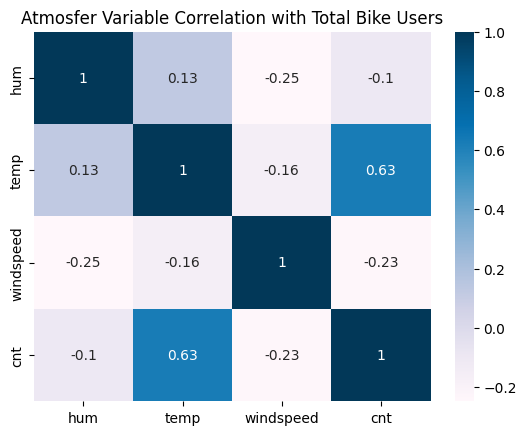

In [42]:
# Menyimpan hasil korelasi yang telah dihitung dalam variabel corr_matrix
corr_matrix = atmosfer_df.corr()

# Membuat grafik heatmap dengan library seaborn
sns.heatmap(corr_matrix, annot=True, cmap='PuBu')
plt.title("Atmosfer Variable Correlation with Total Bike Users")
plt.show()

## Conclusion

- 1) Dinamika jumlah pengguna selama dua tahun ***fluktuatif dan naik turun***, tetapi totalnya terjadi peningkatan sebanyak **64.8%**,  dengan jumlah pengguna terbanyak terjadi di bulan ***Agustus***,
- 2) Rata-rata jumlah pengguna terbanyak ada di akhir pekan, yaitu berturut-turut tertinggi pada hari ***Sabtu, Jumat, dan Minggu***. Tetapi jika ditotal, rata rata jumlah pengguna pada ***hari libur dan hari kerja tidak menunjukkan perbedaan signifikan***
- 3) Rata-rata jumlah pengguna paling banyak pada ***sore hari*** dan paling sedikit di ***malam hari***, Rata-rata jumlah pengguna tertinggi berada pada pukul ***17, 18, 8, 16,*** dan ***9***.
- 4) Jumlah pengguna terbanyak ada pada cuaca ***Clear, Few clouds, Partly cloudy, Partly cloudy***. Tidak ada sama sekali pengguna pada cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog. Sementara musim dengan paling banyak pengguna adalah ***musim gugur (Fall)*** dan paling sedikit musim Semi (Spring)
- 5) Tingkat kelembapan dan kecepatan angin berkorelasi negatif dengan jumlah pengguna, yang menunjukkan ***semakin tinggi kelembapan udara dan kecepatan angin, semakin sedikit jumlah pengguna***. Sedangkan suhu dan jumlah pengguna berkorelasi positif, dann menunjukkan bahwa dengan ***suhu yang lebih tinggi menunjukkan jumlah penyewa yang lebih banyak***